## pyKO Test 3
### ANEOS table ideal gas sod tube test problem vs. analytic solution.


The Sod shock tube test begins with 2 ideal gases at different pressures.<br>
The test is planar with fixed boundaries.

pyKO documentation: https://impactswiki.github.io/pyko

Set the path to pyko and your fortran compiler in import-modules.py file

Sarah T. Stewart<br>
June 27, 2023<br>


In [1]:
# import the same set of modules for each test run provided with pyKO
%run import-modules

Platform:  Darwin Kernel Version 22.5.0: Thu Jun  8 22:21:34 PDT 2023; root:xnu-8796.121.3~7/RELEASE_ARM64_T8112
python version:  3.11.4
matplotlib version:  3.7.1
hvplot version:  0.8.4
numpy version:  1.25.0
pandas version:  2.0.2
pickle version:  4.0
yaml version:  6.0
pint version:  0.22
pyko version:  v0.6-release-2023-06-27

/usr/local/bin/gfortran

GNU Fortran (GCC) 12.1.0
Copyright (C) 2022 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.




In [2]:
## sod shock analytic solution
# sodshock requires scipy and numpy
# sodshock python module from https://github.com/ibackus/sod-shocktube
import sodshock
#

## Check the input file


In [3]:
# path to the input file
filein = './test3/test3-idg-ses.yml'

# initialize the run class variable by loading the configuration file
run = RunClass(fin=filein)
# print the run class state; this will print in code units
run.checkinput()
# the output filename is run.outputfilename

Key nrhomin does not exist. Using default 0.8
Key nrhomin does not exist. Using default 0.8

pyKO v0.6-release-2023-06-27 run parameters
   All outputs are in code units 
   Input file: ./test3/test3-idg-ses.yml 
   Output file: ./test3/pyko-test3-ses-idg-bin.dat 
   Number of materials: 2 
   Number of nodes in each material: [200 300] 
   Length of each material: [2. 3.] 
   Initial left edge of each material: [0. 2.] 
   Boundary conditions: ['FIXED', 'FIXED']
   Material EOS:     ['SES', 'SES'] 
   Geometry:         PLA 
   Gravity:          0.0 
   Void pressure:    1e-09 
   Time step factor: 6 
   Stop time:        20.0

mat1: Hydrodynamic material

mat1 Fracture parameters: 
   Fracture pressure: 0.0 
   Fracture maximum distension (rhomin/rhoref): 0.8

Class SESAME: SES IDG 1 
   eos_table module version v1.1.4 
   table path: ../eos/aneos-N2-demo/ 
   file names: NEW-SESAME-STD.TXT NEW-SESAME-EXT.TXT 
   initial state: 
      rho0: 0.011307000000000003 
      p0:   1.00001821

### Ideal gas unit conversion

The KO input file is in code units, including heat capacity. 

This returns temperatures that are consistent between fKO, pyKO, and sodshock.py

The next 2 cells convert ideal gas mks units to code units to reproduce the example in sodshock

In [4]:
# LAYER 1 LEFT
# what are the units for ideal gas
# P=nRT/V

# N2
# diatomic c_v = 5/2 R
# c_p = c_v + R
# gamma = c_p/c_v = 1.4

# P = 0.01 Mbar = 1 GPa
# T = 300 K
# P = R rho T
# R = 8.314 J/K/mol = m3⋅Pa⋅K−1⋅mol−1
# N2 = 14.0067*2 g/mol

# rho = P / (R T) = 1e9 / (8.314 * 300) * 14.0067*2 /1000 /1.e6 = 400930 mol/m3 * g/mol kg/g m3/(100^3)cm3 = 0.01123 g/cm3

# P0 = 0.01 Mbar
# rho0 = 0.01123 g/cm3
# E = cv * T
# E = 5/2 * 8.314 /(14.0067*2) = J/K/mol * mol/g 


# N2
# MKS first and then convert to code units
R = 8.314 # J/K/mol =  m3 Pa / (K mol)
g_per_mole = 14.0067*2 #g/mol for N2
kg_per_mole = g_per_mole/1000. # kg/mol 
atoms_per_mol = 2. # atoms per molecule
cv = 5./2.*R # diatomic   m3 Pa / (K mol)
cp = cv + R
gamma = cp/cv
T = 298 # K room temp initial state
P = 1.0e5 # Pa
rho = P / (R * T) * kg_per_mole # kg/m3
E = P/(gamma-1.)/rho # kg m/s2 /m2 * m3/kg == m2/s2 (specific internal energy)
cv_sp = cv / (kg_per_mole) # J/K/kg
cv_sp_aneos = cv_sp*1.e7/1000./11604. # erg/ev/g
cs = np.sqrt(gamma*R*T/kg_per_mole) # mks m/s
print('T=',E/cv_sp)
print('mks units rho, gamma, P, T, cv_sp, E, E/cv_sp, cs = ',rho,gamma,P,T,cv_sp,E,E/cv_sp,cs)
print('cv_sp_aneos=',cv_sp_aneos)

# convert to code units
eu = 100e3 # J -> eu ; code energy unit eu = 100 kJ
P_code = P/1.e11 # Pa -> Mbar
rho_code = rho/1000. # kg/m3 ->> g/cm3

E_code = E*rho / 1.e11 # eu/cm3 = 100 GJ/m3
cv_code = cv_sp * rho /1.e11 # eu/K/cm3 = 100 GJ/K/m3

print('code units rho, gamma, P, cv_sp, E = ',rho_code,gamma,P_code,cv_code,E_code)
print(E_code/cv_code)

cv_code_perg = cv_code/rho_code
print(cv_code_perg)

T= 298.00000000000006
mks units rho, gamma, P, T, cv_sp, E, E/cv_sp, cs =  1.1306795524004953 1.4 100000.0 298 741.9663446779041 221105.97071401548 298.00000000000006 351.8797288845276
cv_sp_aneos= 639.4056744897485
code units rho, gamma, P, cv_sp, E =  0.0011306795524004952 1.4 1e-06 8.389261744966442e-09 2.5000000000000006e-06
298.0000000000001
7.419663446779041e-06


In [5]:
# LAYER 1 LEFT
# what are the units for ideal gas
# P=nRT/V

# N2
# diatomic c_v = 5/2 R
# c_p = c_v + R
# gamma = c_p/c_v = 1.4

# P = 0.01 Mbar = 1 GPa
# T = 300 K
# P = R rho T
# R = 8.314 J/K/mol = m3⋅Pa⋅K−1⋅mol−1
# N2 = 14.0067*2 g/mol

# rho = P / (R T) = 1e9 / (8.314 * 300) * 14.0067*2 /1000 /1.e6 = 400930 mol/m3 * g/mol kg/g m3/(100^3)cm3 = 0.01123 g/cm3

# P0 = 0.01 Mbar
# rho0 = 0.01123 g/cm3
# E = cv * T
# E = 5/2 * 8.314 /(14.0067*2) = J/K/mol * mol/g 


# N2
# MKS first and then convert to code units
R = 8.314 # J/K/mol =  m3 Pa / (K mol)
g_per_mole = 14.0067*2 #g/mol for N2
kg_per_mole = g_per_mole/1000. # kg/mol 
atoms_per_mol = 2. # atoms per molecule
cv = 5./2.*R # diatomic   m3 Pa / (K mol)
cp = cv + R
gamma = cp/cv
T = 298 # K room temp initial state
P = 10.e5 # Pa
rho = P / (R * T) * kg_per_mole # kg/m3
E = P/(gamma-1.)/rho # kg m/s2 /m2 * m3/kg == m2/s2 (specific internal energy)
cv_sp = cv / (kg_per_mole) # J/K/kg
cv_sp_cgs = cv_sp*1.e7/1000. # erg/K/g
cs = np.sqrt(gamma*R*T/kg_per_mole) # mks m/s
print('T=',E/cv_sp)
print('mks units rho, gamma, P, T, cv_sp, E, E/cv_sp, cs = ',rho,gamma,P,T,cv_sp,E,E/cv_sp,cs)
print('cv_sp_cgs=',cv_sp_cgs)

# convert to code units
eu = 100e3 # J -> eu ; code energy unit eu = 100 kJ
P_code = P/1.e11 # Pa -> Mbar
rho_code = rho/1000. # kg/m3 ->> g/cm3

E_code = E*rho / 1.e11 # eu/cm3 = 100 GJ/m3
cv_code = cv_sp * rho /1.e11 # eu/K/cm3 = 100 GJ/K/m3

print('code units rho, gamma, P, cv_sp, E = ',rho_code,gamma,P_code,cv_code,E_code)
print(E_code/cv_code)
cv_code_perg = cv_code/rho_code
print(cv_code_perg)
print(g_per_mole)

T= 298.00000000000006
mks units rho, gamma, P, T, cv_sp, E, E/cv_sp, cs =  11.306795524004954 1.4 1000000.0 298 741.9663446779041 221105.97071401545 298.00000000000006 351.8797288845276
cv_sp_cgs= 7419663.446779042
code units rho, gamma, P, cv_sp, E =  0.011306795524004954 1.4 1e-05 8.389261744966443e-08 2.5000000000000005e-05
298.00000000000006
7.419663446779041e-06
28.0134


### Run python KO

Fortan version uses an initial time step of 0.001 microseconds; set as input here for code comparison.

Otherwise pyKO has an initialization section that estimates a good first time step


In [6]:

%time pyko.run(fin=filein,userdtstart=0.001,usertstepscale=1.,verbose=True)

Key nrhomin does not exist. Using default 0.8
Key nrhomin does not exist. Using default 0.8

pyKO v0.6-release-2023-06-27 run parameters
   All outputs are in code units 
   Input file: ./test3/test3-idg-ses.yml 
   Output file: ./test3/pyko-test3-ses-idg-bin.dat 
   Number of materials: 2 
   Number of nodes in each material: [200 300] 
   Length of each material: [2. 3.] 
   Initial left edge of each material: [0. 2.] 
   Boundary conditions: ['FIXED', 'FIXED']
   Material EOS:     ['SES', 'SES'] 
   Geometry:         PLA 
   Gravity:          0.0 
   Void pressure:    1e-09 
   Time step factor: 6 
   Stop time:        20.0

mat1: Hydrodynamic material

mat1 Fracture parameters: 
   Fracture pressure: 0.0 
   Fracture maximum distension (rhomin/rhoref): 0.8

Class SESAME: SES IDG 1 
   eos_table module version v1.1.4 
   table path: ../eos/aneos-N2-demo/ 
   file names: NEW-SESAME-STD.TXT NEW-SESAME-EXT.TXT 
   initial state: 
      rho0: 0.011307000000000003 
      p0:   1.00001821

## Load Python KO results

In [7]:
# pyko output filename is in the input file
pykofileout = run.outputfilename
# initialize a class object to hold the output data
pko = [] # this variable will hold a plain (no units) pandas datafram for plotting
pkodata = OutputClass() # pandas + pint dataframe to read the pickled output data
#
# function to convert the stored pandas structure with pint units to a normal panda file
# hvplot tools do not work with a panda+pint file
# this also lets the user select a subset of variables to read into this notebook
def pyko_to_normal_panda(pkodata):
    df = pd.DataFrame({
            "j"    : pkodata.j.magnitude,
            "stepn" : pkodata.stepn.magnitude,
            "time" : pkodata.time.magnitude,
            "mat" : pkodata.mat.magnitude,
            "pos" : pkodata.pos.magnitude,
            "rho0" : pkodata.rho0.magnitude,
            "rho" : pkodata.rho.magnitude,
            "up" : pkodata.up.magnitude,
            "ie" : pkodata.ie.magnitude,
            "pres" : pkodata.pres.magnitude,
            "mass" : pkodata.mass.magnitude,
            "temp" : pkodata.temp.magnitude,
            "sigmar" : pkodata.sigmar.magnitude,
            "sigmao" : pkodata.sigmao.magnitude,
            "etot" : pkodata.etot.magnitude,
            "dtminj" : pkodata.dtminj.magnitude,
            })
    return df
#
# loop through all the pickle dumps to read in the simulation data
# concat onto a pandas dataframe that stores the variables vs. time
with open(pykofileout,"rb") as f:
    pkodata = pickle.load(f) # keeps units
    if 1:
        # print units
        print('pyKO output file units are the same as the input file units:')
        print('   Time        ',pkodata.time.units)
        print('   Position    ',pkodata.pos.units)
        print('   Density     ',pkodata.rho.units)
        print('   Part. vel.  ',pkodata.up.units)
        print('   Int. energy ',pkodata.ie.units)
        print('   Mass        ',pkodata.mass.units)
        print('   Temperature ',pkodata.temp.units)
        print('   Pressure    ',pkodata.pres.units)
        print('   Stress      ',pkodata.sigmar.units)
    pko = pyko_to_normal_panda(pkodata)
    while True:
        try:
            pkodata = pickle.load(f) # keeps units but only one snapshot at a time
            pko = pd.concat([pko,pyko_to_normal_panda(pkodata)],ignore_index=True) # strips units for plotting
        except:
            break

# convert to same units as fKO for plot comparisons
# from binary in mks
pko['ie']     *= 1.E-11*pko['rho0']    # J/kg * kg/m3 -> 100 GJ/m3 = eu/cm3
pko.rename(columns={"ie": "iev0"},inplace=True)
pko['etot']   *= 1.E-8    # J/kg 10e7 erg/1000 g -> erg/g *1.e-12 -> eu/g
print('iev0 and etot converted to eu/g')
pko['time']   *= 1.0E6    # s->microseconds
pko['dtminj'] *= 1.0E6    # s->microseconds
pko['pos']    *= 1.0E2    # m->cm
pko['pres']   *= 1.E-9    # Pa -> GPa
pko['sigmar'] *= 1.E-9    # Pa -> GPa
pko['sigmao'] *= 1.E-9    # Pa -> GPa
pko['rho']    *= 1.E-3    # kg/m3 -> g/cm3
pko['rho0']   *= 1.E-3    # kg/m3 -> g/cm3

# list the columns in the dataframe
pko.columns


pyKO output file units are the same as the input file units:
   Time         second
   Position     meter
   Density      kilogram / meter ** 3
   Part. vel.   meter / second
   Int. energy  joule / kilogram
   Mass         kilogram
   Temperature  kelvin
   Pressure     pascal
   Stress       pascal
iev0 and etot converted to eu/g


Index(['j', 'stepn', 'time', 'mat', 'pos', 'rho0', 'rho', 'up', 'iev0', 'pres',
       'mass', 'temp', 'sigmar', 'sigmao', 'etot', 'dtminj'],
      dtype='object')

In [8]:
display(pko)

,j,stepn,time,mat,pos,rho0,rho,up,iev0,pres,mass,temp,sigmar,sigmao,etot,dtminj
0,1,0,0.000000,1,0.01,0.011307,0.011307,0.000000e+00,0.000025,0.0010,2.261400e-07,248.304591,0.0000,0.0000,0.000058,0.000000
1,3,0,0.000000,1,0.03,0.011307,0.011307,0.000000e+00,0.000025,0.0010,2.261400e-07,248.304591,0.0000,0.0000,0.000058,0.000000
2,5,0,0.000000,1,0.05,0.011307,0.011307,0.000000e+00,0.000025,0.0010,2.261400e-07,248.304591,0.0000,0.0000,0.000058,0.000000
3,7,0,0.000000,1,0.07,0.011307,0.011307,0.000000e+00,0.000025,0.0010,2.261400e-07,248.304591,0.0000,0.0000,0.000058,0.000000
4,9,0,0.000000,1,0.09,0.011307,0.011307,0.000000e+00,0.000025,0.0010,2.261400e-07,248.304591,0.0000,0.0000,0.000058,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119745,491,507,20.000553,2,4.91,0.001131,0.001131,-5.673802e-06,0.000003,0.0001,2.261400e-08,248.304673,-0.0001,-0.0001,0.000057,0.378917
119746,493,507,20.000553,2,4.93,0.001131,0.001131,-4.186469e-06,0.000003,0.0001,2.261400e-08,248.304673,-0.0001,-0.0001,0.000057,0.378917
119747,495,507,20.000553,2,4.95,0.001131,0.001131,-2.902948e-06,0.000003,0.0001,2.261400e-08,248.304673,-0.0001,-0.0001,0.000057,0.378917
119748,497,507,20.000553,2,4.97,0.001131,0.001131,-1.642514e-06,0.000003,0.0001,2.261400e-08,248.304673,-0.0001,-0.0001,0.000057,0.378917


In [9]:
# plotting range for position axis
xr = [-1,6]

In [10]:
pko.hvplot.scatter(x='pos',y='pres',groupby='time',by='mat',hover_cols=['all'],
                       title='pyKO vs. Time (microseconds)',
                       xlabel='Position (cm)',ylabel='Pressure (GPa)',xlim=xr)

:DynamicMap   [time]
   :NdOverlay   [mat]
      :Scatter   [pos]   (pres)

In [11]:
pko.hvplot.scatter(x='pos',y='up',groupby='time',by='mat',hover_cols=['all'],
                       title='pyKO vs Time (microseconds)',
                       xlabel='Position (cm)',ylabel='Particle Velocity (10 km/s)',xlim=xr)

:DynamicMap   [time]
   :NdOverlay   [mat]
      :Scatter   [pos]   (up)

In [12]:
pko.hvplot.scatter(x='pos',y='iev0',groupby='time',by='mat',hover_cols=['all'],
                       title='pyKO vs Time (microseconds)',
                       xlabel='Position (cm)',ylabel='Internal Energy',xlim=xr)  

:DynamicMap   [time]
   :NdOverlay   [mat]
      :Scatter   [pos]   (iev0)

In [13]:
pko.hvplot.scatter(x='pos',y='rho',groupby='time',by='mat',hover_cols=['all'],
                       title='pyKO vs Time (microseconds)',
                       xlabel='Position (cm)',ylabel='Density (g/cm3)',xlim=xr)  

:DynamicMap   [time]
   :NdOverlay   [mat]
      :Scatter   [pos]   (rho)

In [14]:
pko.hvplot.scatter(x='pos',y='temp',groupby='time',by='mat',hover_cols=['all'],
                       title='pyKO vs Time (microseconds)',
                       xlabel='Position (cm)',ylabel='Temperature (K)',ylim=[100,400])

:DynamicMap   [time]
   :NdOverlay   [mat]
      :Scatter   [pos]   (temp)

### now calculate the analytic solution from the sodshock module

In [15]:
# these initial conditions match the KO calculations
# the units are any self-consistent unit set
# so here, using units to match KO
gamma = 1.4
dustFrac = 0.0
npts = 500
t = 20.
left_state = (1.e-5,1.13e-2,0)
right_state = (1.e-6,1.13e-3, 0.)

# left_state and right_state set pressure, density and u (velocity)
# geometry sets left boundary on 0., right boundary on 1 and initial
# position of the shock xi on 0.5
# t is the time evolution for which positions and states in tube should be 
# calculated
# gamma denotes specific heat
# note that gamma and npts are default parameters (1.4 and 500) in solve 
# function
positions, regions, values = sodshock.solve(left_state=left_state, \
    right_state=right_state, geometry=(0., 5., 2.), t=t, 
    gamma=gamma, npts=npts, dustFrac=dustFrac)


In [16]:
list(values)

['x', 'p', 'rho', 'u', 'energy', 'rho_total']

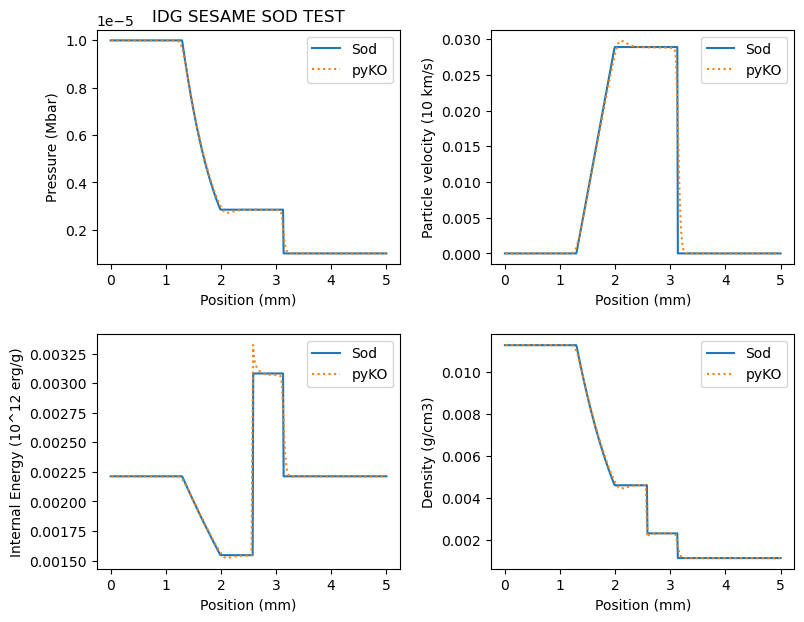

In [17]:
title='IDG SESAME SOD TEST'
#title='IDG ANALYTIC SOD TEST'

plt.rcParams["figure.figsize"] = (9,7)

figb, axs = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# add title of the problem and time to the top of the plot
axs[0,0].set_title(title)
axs[0,0].plot(values['x'],values['p'],label='Sod')
axs[0,0].set_xlabel('Position (mm)')
axs[0,0].set_ylabel('Pressure (Mbar)')
ptime = np.unique(pko["time"])
pindex = np.where((pko["time"] == ptime[-1]))[0]
axs[0,0].plot(pko["pos"][pindex],pko["pres"][pindex]/100.,':',label='pyKO')
#axs[0,0].plot(pko["pos"][pindex],-pko["sigmar"][pindex],label='sig_r')
axs[0,0].legend()

axs[0,1].plot(values['x'],values['u'],label='Sod')
axs[0,1].set_xlabel('Position (mm)')
axs[0,1].set_ylabel('Particle velocity (10 km/s)')
ptime = np.unique(pko["time"])
pindex = np.where((pko["time"] == ptime[-1]))[0]
axs[0,1].plot(pko["pos"][pindex],pko["up"][pindex]/1.e4,':',label='pyKO')
axs[0,1].legend()

axs[1,1].plot(values['x'],values['rho'],label='Sod')
axs[1,1].set_xlabel('Position (mm)')
axs[1,1].set_ylabel('Density (g/cm3)')
ptime = np.unique(pko["time"])
pindex = np.where((pko["time"] == ptime[-1]))[0]
axs[1,1].plot(pko["pos"][pindex],pko["rho"][pindex],':',label='pyKO')
axs[1,1].legend()

axs[1,0].plot(values['x'],values['energy'],label='Sod')
axs[1,0].set_xlabel('Position (mm)')
axs[1,0].set_ylabel('Internal Energy (10^12 erg/g)')
ptime = np.unique(pko["time"])
pindex = np.where((pko["time"] == ptime[-1]))[0]
axs[1,0].plot(pko["pos"][pindex],pko["iev0"][pindex]/pko["rho0"][pindex],':',label='pyKO')
axs[1,0].legend()

figb.savefig('./test3/pyko-test3-ses-idg-sod-test.png')


### Temperature discrepancy with ANEOS and hand calculation

There is a temperature offset with the ANEOS ideal gas table. Not sure where the user input error is for setting up the ANEOS ideal gas model.
Not resolved as of 2/10/2023. Will return to this later.


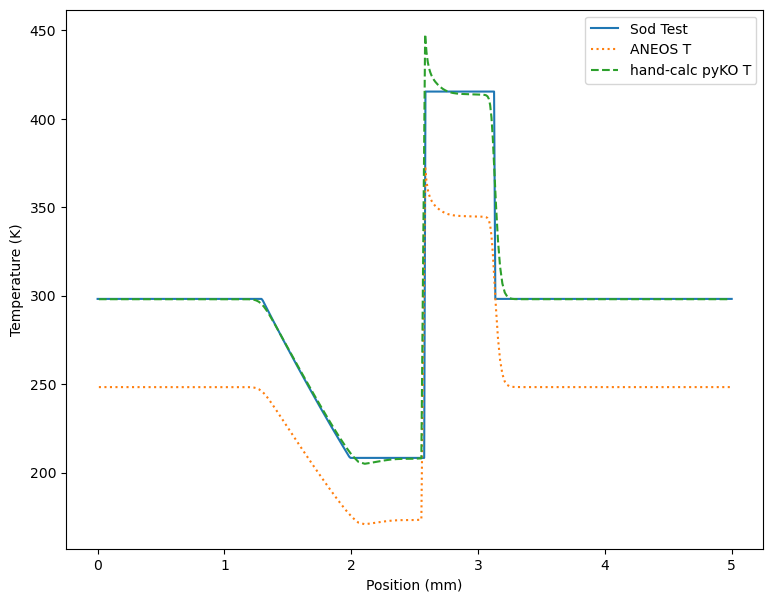

In [18]:
# x is an array from 0 to 5 with original boundary at 2; 500 points
tempsod = np.zeros(500)
tempsod[0:200] = values['energy'][0:200]/7.419663446779041e-06 # divide by cv in eu/g
tempsod[200::] = values['energy'][200::]/7.419663446779041e-06 # cv in eu/g

pkotemp = pko["iev0"][pindex]
imat1 = pindex[np.where(pko["mat"][pindex] == 1)[0]]
#print(imat1)
#print(len(imat1))
pkotemp[0:100] = pko["iev0"][imat1]/8.389261744966443e-08 # divide by cv in pyKO units
imat2 = pindex[np.where(pko["mat"][pindex] == 2)[0]]
pkotemp[100::] = pko["iev0"][imat2]/8.389261744966443e-09 # pyKO units

plt.plot(values['x'],tempsod,label='Sod Test')
plt.xlabel('Position (mm)')
plt.ylabel('Temperature (K)')
ptime = np.unique(pko["time"])
pindex = np.where((pko["time"] == ptime[-1]))[0]
plt.plot(pko["pos"][pindex],pko["temp"][pindex],':',label='ANEOS T')
plt.plot(pko["pos"][pindex],pkotemp,'--',label='hand-calc pyKO T')
plt.legend()


### Energy Conservation Check

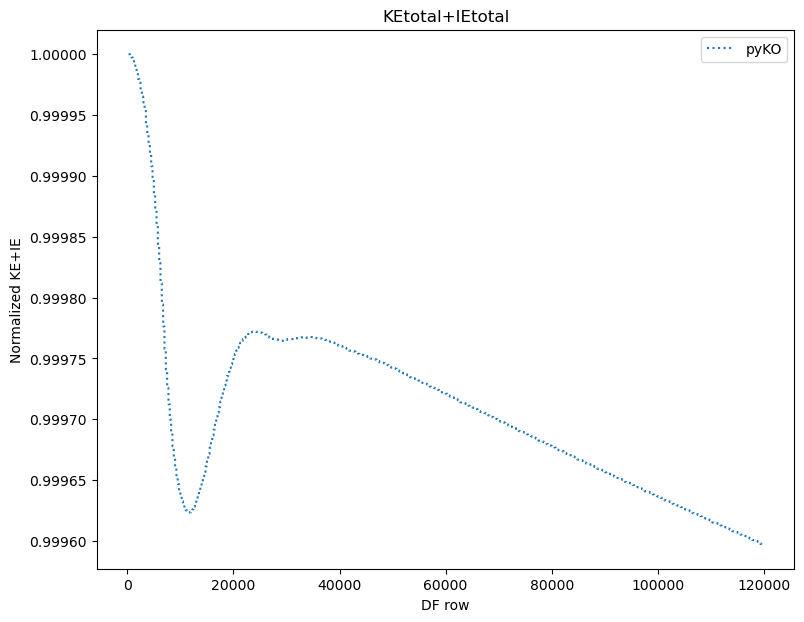

In [19]:
istart = np.where(pko['time']>0.)[0]
plt.plot(pko["etot"][istart]/pko["etot"][istart[0]],':',label='pyKO')
plt.xlabel('DF row')
plt.title('KEtotal+IEtotal')
plt.ylabel('Normalized KE+IE')
plt.legend()


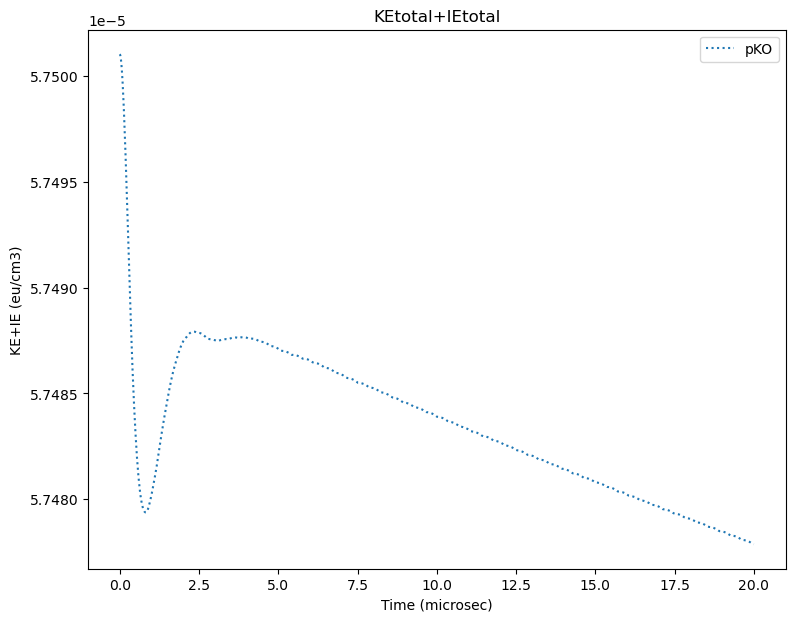

In [20]:
plt.plot(pko['time'],pko['etot'],':',label='pKO')
plt.xlabel('Time (microsec)')
plt.title('KEtotal+IEtotal')
plt.ylabel('KE+IE (eu/cm3)')
plt.legend()


End of notebook